This is a tutorial of predicting value by tensorflow.

Reference:
https://www.codexa.net/tensorflow-for-begginer/

In [21]:
#Import libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
 
print(tf.__version__)
print(np.__version__)
print(pd.__version__)

1.13.1
1.16.4
0.24.2


Dataset overview is follows:
(Dataset contain scikit-learn library)

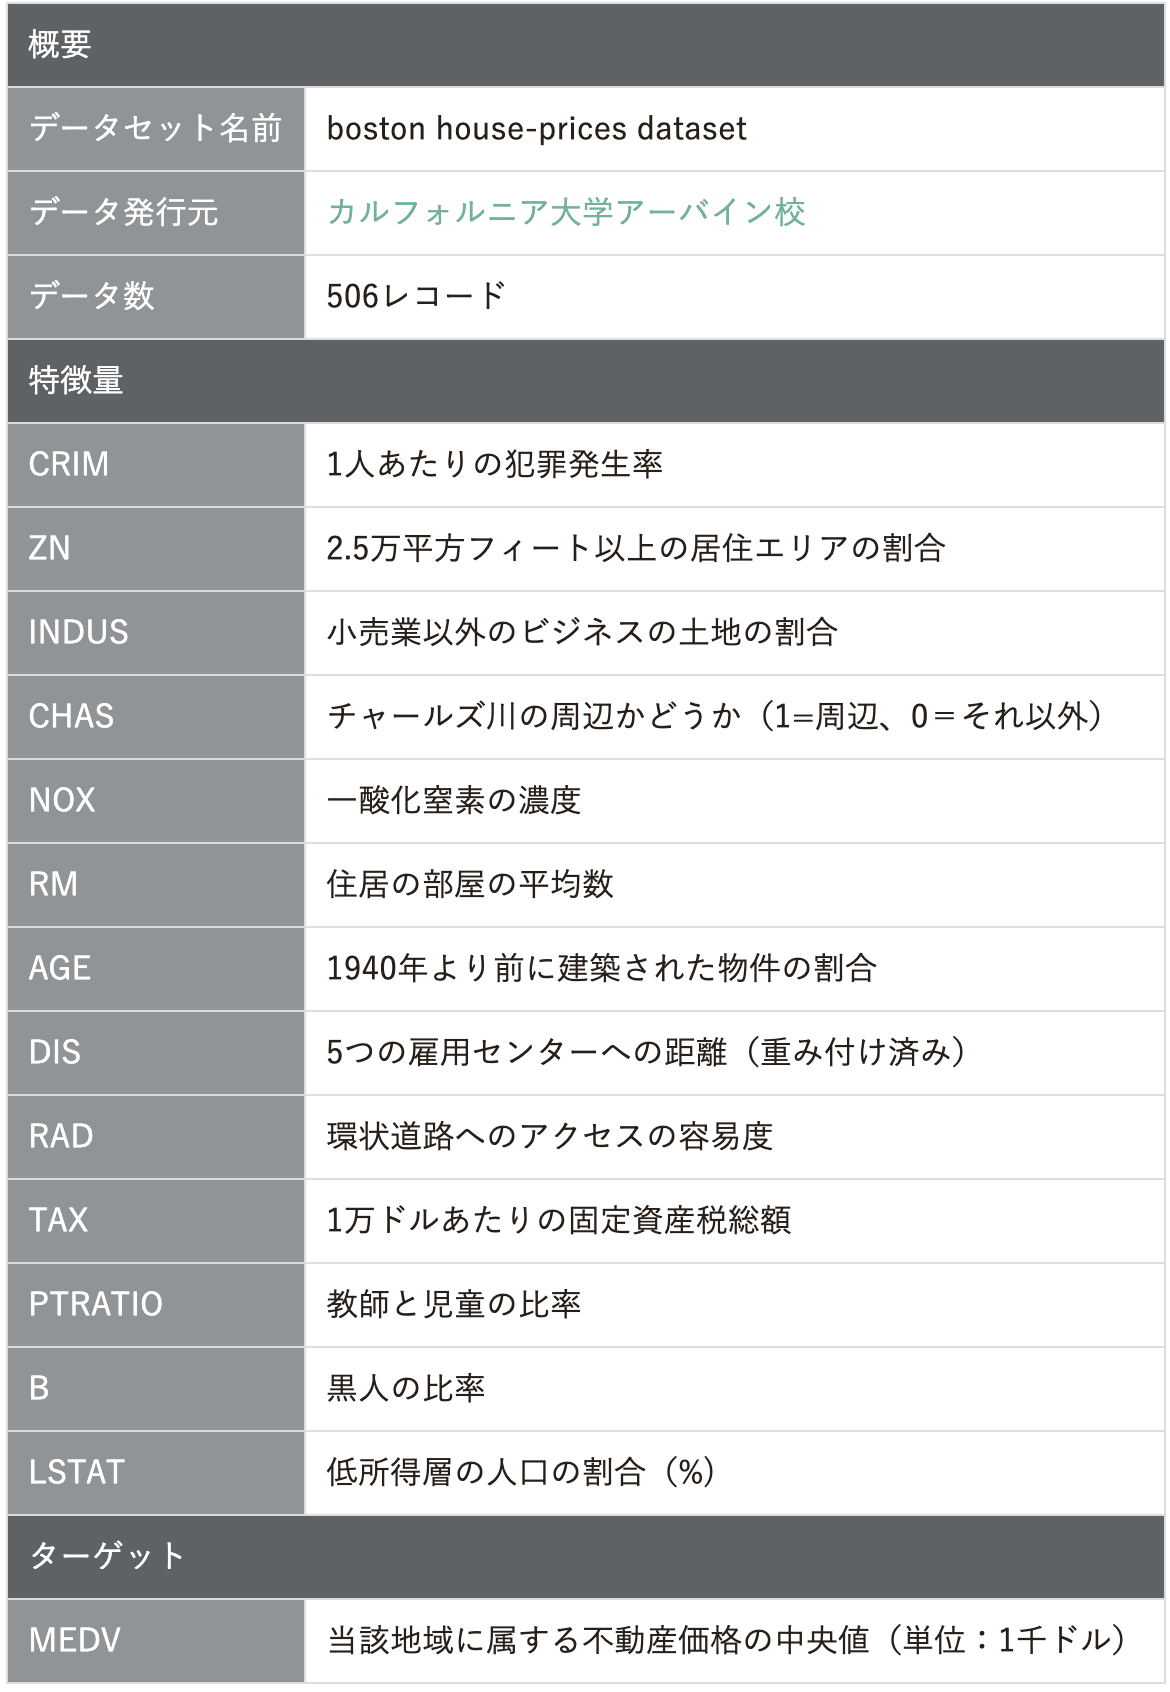

In [2]:
# Load data
boston = load_boston()
 
# change data to dataframe
df = pd.DataFrame(boston.data, columns=boston.feature_names)

#devide y data
df['target'] = boston.target
 
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#Pre-Processing data

In [6]:
# devide x and y
X_data = np.array(boston.data)
y_data = np.array(boston.target)

print(X_data[0:1])
print(y_data[0:1])

[[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
  4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]]
[24.]


Some type of machine learning need scaling for effective learning.  
For example, if you use liner regression model (like this tutorial) we need to scaling because we use optimization algrithm "gradient decent".

In [7]:
#Feature scaling(Normalization), axis=0 descrive calcurate column direction
def norm(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    return (data - mean) / std
 
# set scaling data
X_data = norm(X_data)
print(X_data[0:1])

[[-0.41978194  0.28482986 -1.2879095  -0.27259857 -0.14421743  0.41367189
  -0.12001342  0.1402136  -0.98284286 -0.66660821 -1.45900038  0.44105193
  -1.0755623 ]]


In [8]:
#add ones column. This pre-processing is good for calucuration.
print(X_data.shape)
 
# make ones vector
ones = np.ones((506, 1))
 
# add ones vector to x matrix
X_data = np.c_[ones, X_data]
X_data.shape

(506, 13)


(506, 14)

In [10]:
#split data to training and test data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
#If we don't reshape, y_train.shape become (404,). Maybe this data shape make some error.
y_train = y_train.reshape(404,1)
y_test = y_test.reshape(102,1)
 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(404, 14)
(404, 1)
(102, 14)
(102, 1)


#Let's build liner regression model

In [11]:
#set hyper parameters
learning_rate = 0.01
training_epochs = 100
 
# number of parameter. In this time n_dim=14.
n_dim = X_data.shape[1]
 
# Set placeholder
X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,1])
 
# Set weight and bais
W = tf.Variable(tf.ones([n_dim,1]))
b = tf.Variable(0.0)

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
# Liner regression model y= WX + b
y = tf.add(b, tf.matmul(X, W))
 
# cost function
cost = tf.reduce_mean(tf.square(y - Y))
 
# optimizaion
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

#Let's training our model

In [14]:
# Initialization
init = tf.global_variables_initializer()
 
cost_history=[]
    
# Let's training!
sess = tf.Session()
sess.run(init)
 
for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={X:X_train, Y:y_train})
    cost_history = np.append(cost_history, sess.run(cost, feed_dict={X:X_train, Y:y_train}))
    if epoch % 100 == 0:
        W_val = sess.run(W)
        b_val = sess.run(b)

In [17]:
print(cost_history[0])
print(cost_history[50])
print(cost_history[99])

559.8897705078125
35.08163070678711
25.037134170532227


#Predicting test data value

In [18]:
#Predict y, results stored pred_test. Feed only X_test data into the liner regression model.
pred_test = sess.run(y, feed_dict={X: X_test})

In [19]:
pred = pd.DataFrame({"Actual value":y_test[:,0], "Predict value":pred_test[:,0]})
pred.head()

,Actual value,Predict value
0,23.6,26.496683
1,32.4,33.815285
2,13.6,16.893112
3,22.8,22.576111
4,16.1,18.901030


In [22]:
MAE_test = mean_absolute_error(y_test, pred_test)
print(MAE_test)

3.1832439974242566


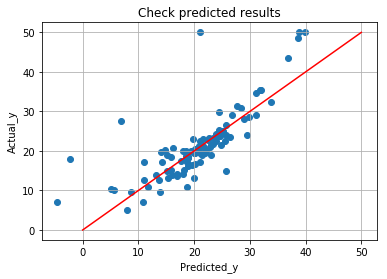

In [26]:
plt.scatter(pred_test, y_test)
plt.plot([0,50], [0,50], c="red")
plt.title("Check predicted results")
plt.xlabel("Predicted_y")
plt.ylabel("Actual_y")
plt.grid(True)